## Final Project Submission

Please fill out:
* Student name: Henry Van Gorp
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni
* Blog post URL: TBD


# Business Understanding

A real estate investment company which is new to the northwest is looking to understand how the homes in King County, Washington are being sold.  They are looking to understand how the attributes of a home increase the sale price. 

# Data Understanding

The data which is being utlized for this project focuses

### Import Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./data/kc_house_data.csv")

data.reset_index(inplace = True)

In [4]:
data.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
data.describe()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preparation

### Data Info

Looking at null values, data types and column names

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  object 
 10  view           21534 non-null  object 
 11  condition      21597 non-null  object 
 12  grade          21597 non-null  object 
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

### Check Null Values

An overview of null values in the datasets columns.

In [7]:
data.isna().sum()

index               0
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Clean Data

### Squarefeet Basement

Squarefeet basement was listed as an object.  To make clean this category we replaced the '?" will null values.  After changing the dat type from an object to a float we filled the null values with the mean of the overall column.  Rather than determining if there is a basement or not, we kept the square footage to see if price goes up with square footage.

In [8]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
556.0         1
2850.0        1
65.0          1
2600.0        1
3000.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [9]:
data['sqft_basement'].replace('?',np.nan,inplace=True)

In [10]:
data.sqft_basement = data.sqft_basement.astype("float")

In [11]:
data.sqft_basement.fillna(data['sqft_basement'].mean(),inplace=True)

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

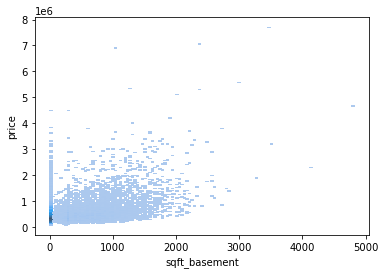

In [23]:
sns.histplot(x = 'sqft_basement', y = 'price', data=data)

### Waterfront

Waterfront had null values.  The assumption is that null values represent that there is no waterfront.
Renamed yes to waterfront as 1 and no to waterfront as 0.

In [12]:
data['waterfront'].value_counts(normalize=True)

NO     0.992404
YES    0.007596
Name: waterfront, dtype: float64

In [13]:
data['waterfront'].fillna('NO', inplace=True)

In [14]:
data['waterfront'] = data.waterfront.map({'NO': 0, 'YES': 1})

In [15]:
data['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

### Renovated

Change the structure of the data to represent 1 as renovated and 0 as not renovated.  Null values were changed to not renovated under assumption.

In [16]:
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [17]:
data['yr_renovated'].fillna(0.0, inplace=True)

In [18]:
data['yr_renovated']=data['yr_renovated'].apply(lambda x: 1 if x!=0 else x)

In [19]:
data['yr_renovated'].value_counts()

0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

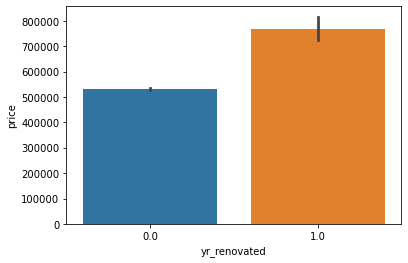

In [20]:
sns.barplot(x = 'yr_renovated', y = 'price', data=data)

### View

In [19]:
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

<AxesSubplot:xlabel='view', ylabel='price'>

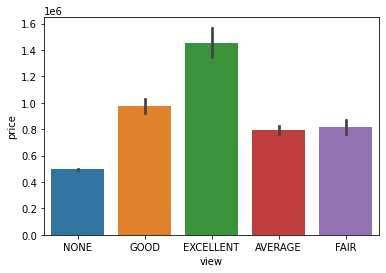

In [20]:
sns.barplot(x = 'view', y = 'price', data=data)

In [121]:
data['view'].fillna('NONE', inplace=True)

In [122]:
data['view']=data['view'].apply(lambda x: 0 if x== 'NONE' else 1)

In [123]:
data['view'].value_counts()

0    19485
1     2112
Name: view, dtype: int64

### Grade

In [124]:
data['grade'].value_counts(normalize=True)

7 Average        0.415521
8 Good           0.280826
9 Better         0.121082
6 Low Average    0.094365
10 Very Good     0.052507
11 Excellent     0.018475
5 Fair           0.011205
12 Luxury        0.004121
4 Low            0.001250
13 Mansion       0.000602
3 Poor           0.000046
Name: grade, dtype: float64

### Condition

In [125]:
data['condition'].value_counts(normalize=True)

Average      0.649164
Good         0.262861
Very Good    0.078761
Fair         0.007871
Poor         0.001343
Name: condition, dtype: float64

## Visualizing Distributions

### Histograms

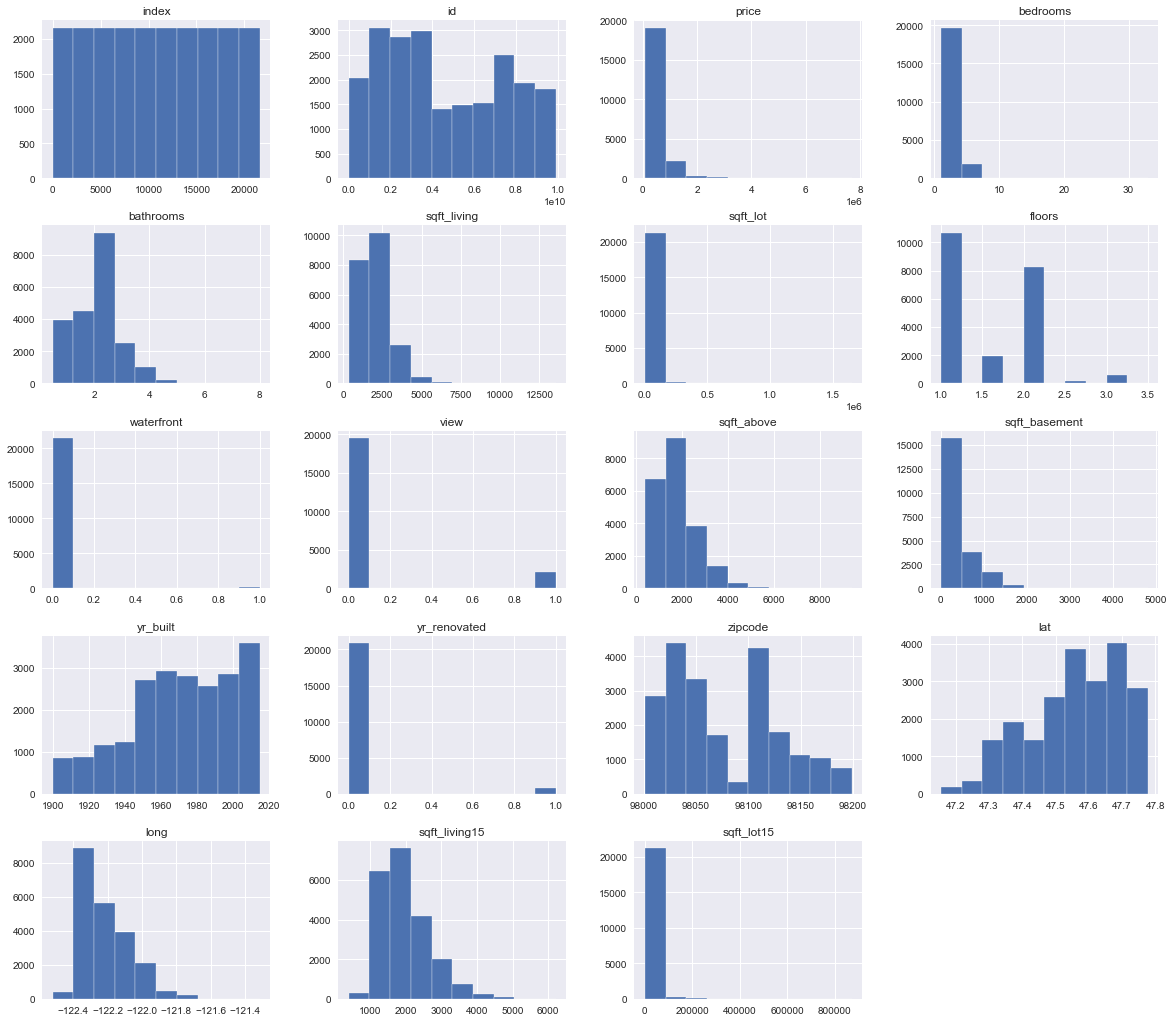

In [126]:
data.hist(figsize = (20, 18));

<AxesSubplot:>

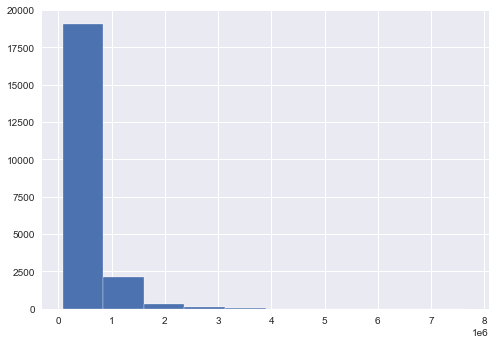

In [127]:
data.price.hist()

Run a log function to change the structure of price to make it normally distirbuted.

In [128]:
p = np.log(data.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

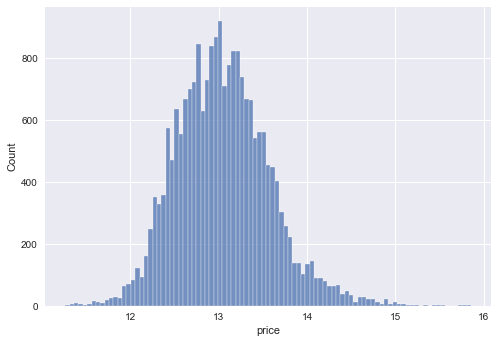

In [129]:
sns.histplot(p)

### Check for Linearity

Checking for linearity between price and the squarefeet of living space.  sqft_living seems to have a linear relationship with list_price.

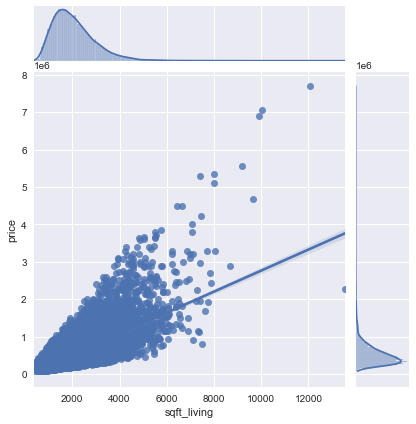

In [130]:
sns.jointplot('sqft_living', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

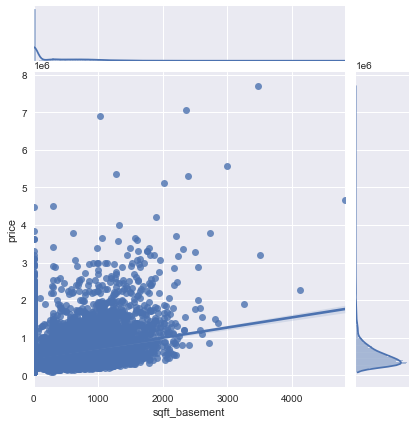

In [131]:
sns.jointplot('sqft_basement', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and the amount of floors.  Seems that price and floors has a slight linear relationship.

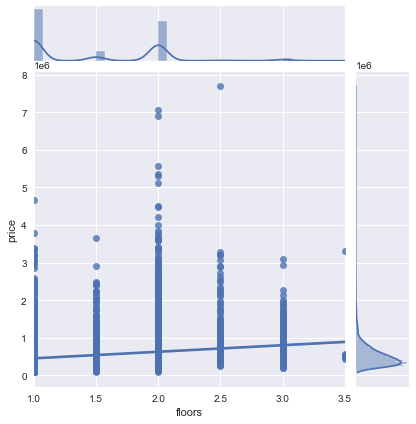

In [132]:
sns.jointplot('floors', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

Checking for linearity between price and bathrooms.  Bathrooms and price have a linear relationship.

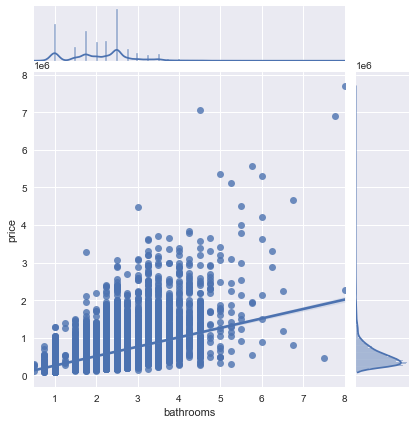

In [133]:
sns.jointplot('bathrooms', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

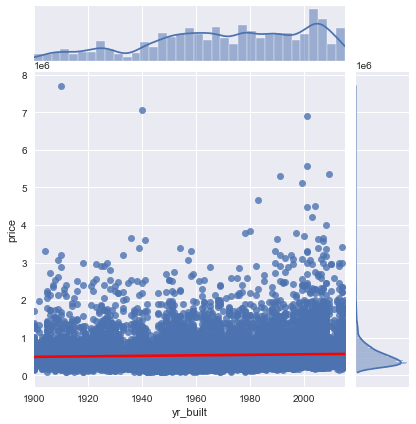

In [147]:
g = sns.jointplot('yr_built', 'price', data=data, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
plt.style.use('seaborn')
sns.set_style("darkgrid")

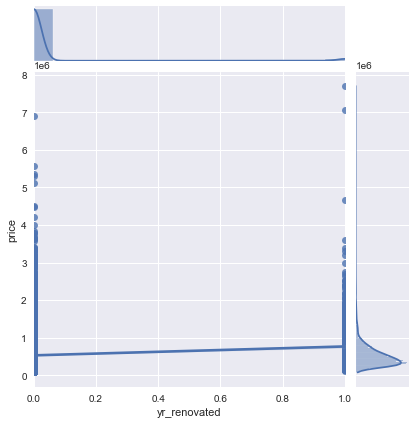

In [135]:
sns.jointplot('yr_renovated', 'price', data=data, kind='reg')
plt.style.use('seaborn')
sns.set_style("darkgrid")

### Check for Multicolinearity

<AxesSubplot:>

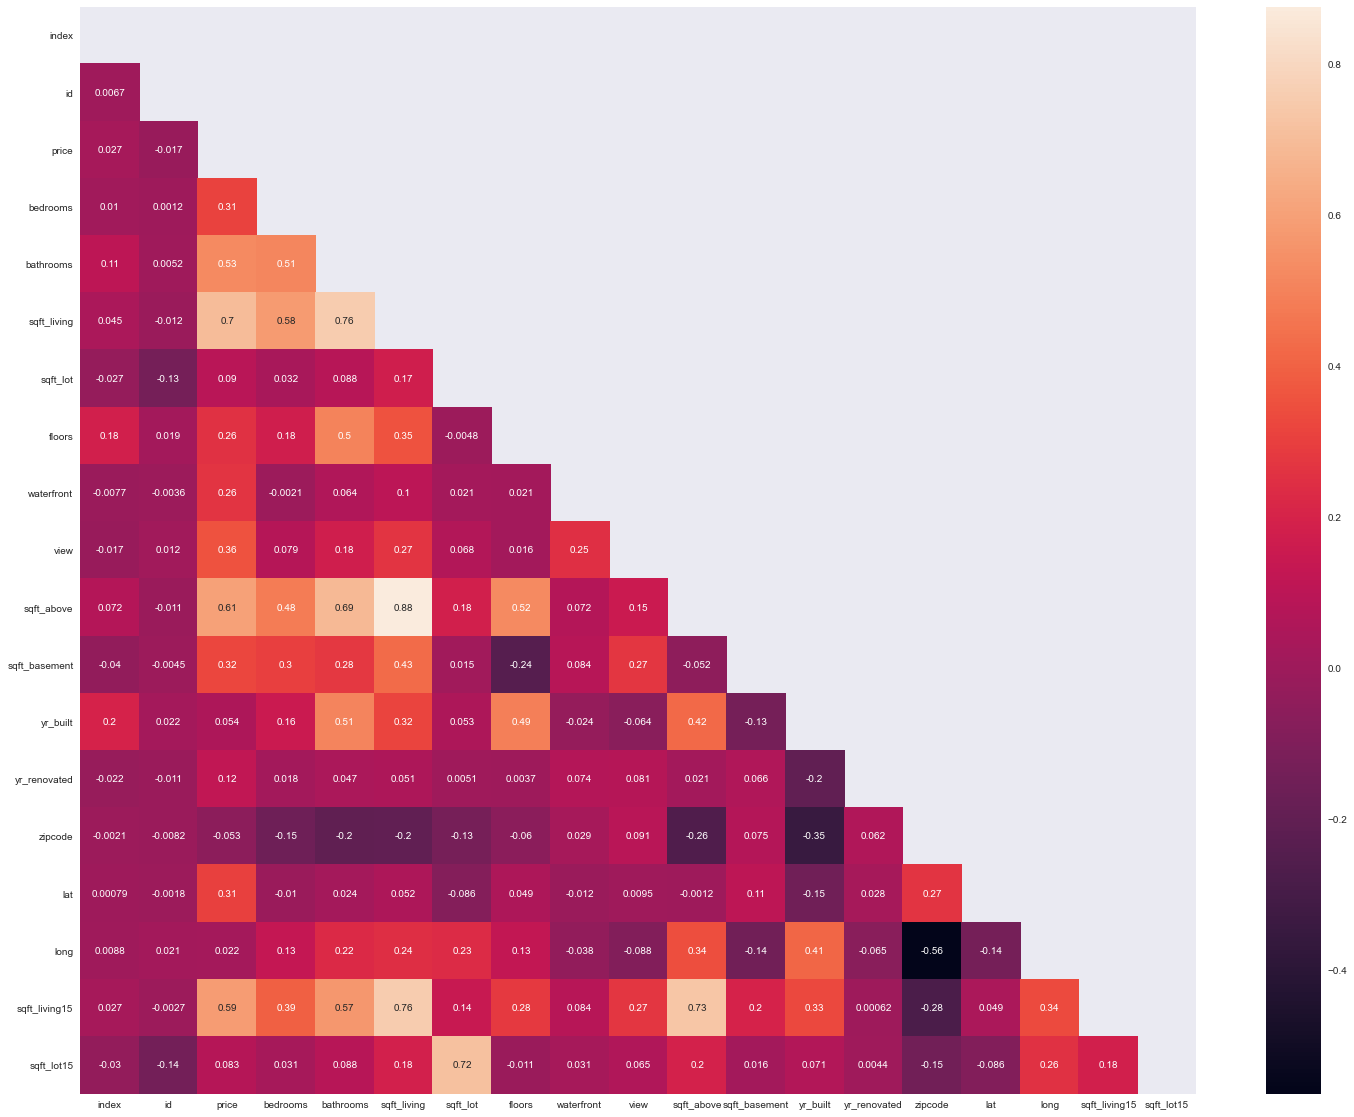

In [136]:
corr = data.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
plt.figure(figsize=(25,20))
sns.heatmap(corr, mask = trimask, annot = True)

# Modeling

## Create Baseline Model

In [137]:
price = data['price']

In [138]:
features = ['sqft_living', 'sqft_above', 'bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'sqft_basement']

In [139]:
model_data = data.loc[:, features]

In [140]:
import statsmodels.api as sm

baseline_model = sm.OLS(price, model_data).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                          1.673e+04
Date:                Wed, 02 Feb 2022   Prob (F-statistic):                        0.00
Time:                        18:19:41   Log-Likelihood:                     -2.9974e+05
No. Observations:               21597   AIC:                                  5.995e+05
Df Residuals:                   21590   BIC:                                  5.995e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     258.2167     27.057      9.543      0.000     205.182     311.251
sqft_above       43.2985     27.071      1.599      0.110      -9.764      96.360
bathrooms      6149.8465   3850.382      1.597      0.110   -1397.187    1.37e+04
bedrooms      -4.609e+04   1822.624    -25.287      0.000   -4.97e+04   -4.25e+04
floors         2.997e+04   3899.906      7.684      0.000    2.23e+04    3.76e+04
sqft_lot         -0.3096      0.043     -7.143      0.000      -0.395      -0.225
sqft_basement    82.9926     27.150      3.057      0.002      29.776     136.209
==============================================================================
Omnibus:                    13884.138   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           448940.588
Skew:                           2.600   Prob(JB):                         0.00
Kurtosis:                      24.722   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Remodeling

In [141]:
features_2 = ['sqft_living', 'bedrooms', 'floors', 'sqft_lot', 'sqft_basement']

In [142]:
model_data2 = data.loc[:, features_2]

In [143]:
model2 = sm.OLS(p, model_data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          9.065e+04
Date:                Wed, 02 Feb 2022   Prob (F-statistic):                        0.00
Time:                        18:19:49   Log-Likelihood:                         -52763.
No. Observations:               21597   AIC:                                  1.055e+05
Df Residuals:                   21592   BIC:                                  1.056e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living      -0.0004   3.06e-05    -13.523      0.000      -0.000      -0.000
bedrooms          2.3679      0.019    124.831      0.000       2.331       2.405
floors            3.2529      0.037     88.199      0.000       3.181       3.325
sqft_lot        6.64e-06   4.68e-07     14.184      0.000    5.72e-06    7.56e-06
sqft_basement     0.0012   5.42e-05     21.477      0.000       0.001       0.001
==============================================================================
Omnibus:                     7685.590   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           338575.449
Skew:                          -0.987   Prob(JB):                         0.00
Kurtosis:                      22.296   Cond. No.                     8.91e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
import statsmodels.api as sm
import scipy.stats as stats

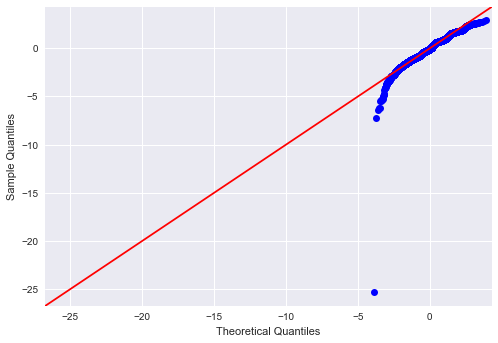

In [145]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)